In [215]:
import json
import pandas as pd
import numpy as np
import warnings
import pickle as pkl
from tqdm import tqdm

from collections import Counter

warnings.filterwarnings('ignore')

In [216]:
is_save = True

user actions

In [217]:
def read_data(f):
    data = []
    for line in f.readlines():
        data.append(json.loads(line))
    return data

try:
    with open('./tuples/relations/user_actions.pkl', 'rb') as f:
        user_action_df = pkl.load(f)
except IOError:
    with open('./tuples/relations/user_video_act.json', 'r') as f:
        user_actions = read_data(f)

    data = []
    for ua in user_actions:
        user_id = ua['id']
        activity = ua['activity']
        for act in activity:
            course_id = act['course_id']
            video_id = act['video_id']
            watch_count = act['watching_count']
            video_duration = act['video_duration']
            watch_time = act['local_watching_time']
            start_time = act['local_start_time']
            end_time = act['local_end_time']
            data.append([user_id, course_id, video_id, watch_count, video_duration, watch_time, start_time, end_time])

    user_action_df = pd.DataFrame(data, columns=['user_id', 'course_id', 'video_id',
                                            'watch_count', 'video_duration', 
                                            'watch_time', 'start_time', 'end_time'])
    # store user actions to speed
    with open('./tuples/relations/user_actions.pkl', 'wb') as f:
        pkl.dump(user_action_df, f)

In [218]:
user_video = pd.read_csv('./tuples/relations/rel_user_video.csv', sep=',')
user_video.columns = ['user_id', 'video_id']

In [219]:
user_action_df = pd.merge(user_action_df, user_video, on=['user_id', 'video_id'])

In [220]:
# filter user and video less than 4
user_counter = Counter(user_action_df['user_id'])
selected_user_set = set(dict(filter(lambda x: x[1] >= 4, user_counter.items())).keys())

video_counter = Counter(user_action_df['video_id'])
selected_video_set = set(dict(filter(lambda x: x[1] >= 4, video_counter.items())).keys())

len(selected_user_set), len(set(user_video['user_id'])), len(selected_video_set), len(set(user_video['video_id']))

(1713, 4361, 1202, 1213)

In [221]:
selected_user_action_df = user_action_df[user_action_df['video_id'].isin(selected_video_set) &
                                         user_action_df['user_id'].isin(selected_user_set)]
len(selected_user_action_df)

126131

In [222]:
selected_user_action_df.head(3)

,user_id,course_id,video_id,watch_count,video_duration,watch_time,start_time,end_time
0,U_8519784,C_course-v1:TsinghuaX+00740123_X+sp,V_02d3cac3665d43dfafb36b571d0c5fc2,1,366.0,187,2018-04-05 00:02:07,2018-04-05 00:05:14
1,U_8519784,C_course-v1:TsinghuaX+00740123_X+sp,V_05983f4ae5894752a8277c5f1802ff2e,7,708.0,398,2018-04-05 18:06:29,2018-04-07 23:28:12
2,U_8519784,C_course-v1:TsinghuaX+00740043X_2015_T2+sp,V_066642610d0d4dd8939f0271f933cfba,3,328.0,274,2018-02-18 23:46:34,2018-02-18 23:51:11


In [223]:
selected_user_action_df['start_time'].min(), selected_user_action_df['start_time'].max()

('2015-12-22 14:45:34', '2020-04-16 21:41:20')

In [224]:
selected_user_set = set(selected_user_action_df['user_id'])
selected_video_set = set(selected_user_action_df['video_id'])

course-video

In [225]:
selected_course_set = set(selected_user_action_df['course_id'])

course_video = pd.read_csv('./tuples/relations/rel_course_video.csv', sep=',')
course_video.columns = ['course_id', 'video_id']
selected_course_video = course_video[course_video['course_id'].isin(selected_course_set) &
                                     course_video['video_id'].isin(selected_video_set)]

In [226]:
course = pd.read_csv('./tuples/entities/course.csv', sep=',')
course.columns = ['course_id', 'course_name']

selected_course_info = course[course['course_id'].isin(selected_course_set)]
selected_course_info

,course_id,course_name
14,C_course-v1:UST+UST001+sp,网络技术与应用
27,C_course-v1:TsinghuaX+00740043X_2015_T2+sp,C++语言程序设计基础
28,C_course-v1:TsinghuaX+00740043_2x_2015_T2+sp,C++语言程序设计进阶
57,C_course-v1:MITx+6_00_1x+sp,计算机科学和Python编程导论
62,C_course-v1:TsinghuaX+30240184+sp,数据结构
65,C_course-v1:TsinghuaX+30240184_2X+sp,数据结构
66,C_course-v1:TsinghuaX+30240243X+sp,操作系统
99,C_course-v1:TsinghuaX+00740123_X+sp,Java程序设计
102,C_course-v1:JXUST+JXUST2016001+2016_T2,人工智能
355,C_course-v1:TsinghuaX+00740123X+2019_T1,Java程序设计


school

In [227]:
school_course = pd.read_csv('./tuples/relations/rel_school_course.csv', sep=',')
school_course.columns = ['school_id', 'course_id']

selected_school_course = school_course[school_course['course_id'].isin(selected_course_set)]
selected_school_set = set(selected_school_course['school_id'])

teacher

In [228]:
teacher_course = pd.read_csv('./tuples/relations/rel_teacher_course.csv', sep=',')
teacher_course.columns = ['teacher_id', 'course_id']

selected_teacher_course = teacher_course[teacher_course['course_id'].isin(selected_course_set)]
selected_teacher_set = set(selected_teacher_course['teacher_id'])

In [229]:
school_teacher = pd.read_csv('./tuples/relations/rel_school_teacher.csv', sep=',')
school_teacher.columns = ['school_id', 'teacher_id']

selected_school_teacher = school_teacher[school_teacher['school_id'].isin(selected_school_set) &
                                         school_teacher['teacher_id'].isin(selected_teacher_set)]

concept

In [230]:
video_concept = pd.read_csv('./tuples/relations/rel_video_concept.csv', sep=',')
video_concept.columns = ['video_id', 'concept_id']

selected_video_concept = video_concept[video_concept['video_id'].isin(selected_video_set)]
selected_concept_set = set(selected_video_concept['concept_id'])

In [231]:
course_concept = pd.read_csv('./tuples/relations/rel_course_concept.csv', sep=',')
course_concept.columns = ['course_id', 'concept_id']

selected_course_concept = course_concept[(course_concept['course_id'].isin(selected_course_set)) & \
                                         (course_concept['concept_id'].isin(selected_concept_set))]

In [232]:
field_concept = pd.read_csv('./tuples/relations/rel_field_concept.csv', sep=',')
field_concept.columns = ['field_concept_id', 'concept_id']

selected_field_concept = field_concept[field_concept['concept_id'].isin(selected_concept_set)]

In [233]:
len(selected_field_concept)

27

In [234]:
concept_dependency = pd.read_csv('./tuples/relations/rel_prerequisite_dependency.csv', sep=',')
concept_dependency.columns = ['start_concept_id', 'end_concept_id']

selected_concept_dependency = concept_dependency[
    (concept_dependency['start_concept_id'].isin(selected_concept_set)) & \
    (concept_dependency['end_concept_id'].isin(selected_concept_set))]

In [235]:
parent_son_concept = pd.read_csv('./tuples/relations/parent-son.json', sep='\t', header=None,
                                 names=['p_concept_id', 's_concept_id'])
selected_parent_son_concept = parent_son_concept[(parent_son_concept['p_concept_id'].isin(selected_concept_set)) | \
                                                 (parent_son_concept['s_concept_id'].isin(selected_concept_set))]

In [236]:
len(selected_parent_son_concept)

490

In [237]:
print('n_user:', len(selected_user_set))
print('n_video:', len(selected_video_set))
print('n_concept:', len(selected_concept_set))
print('n_course:', len(selected_course_set))
print('n_school:', len(selected_school_set))
print('n_teacher:', len(selected_teacher_set))

print('n_user_video:', len(selected_user_action_df))
print('n_video_concept:', len(selected_video_concept))
print('n_course_video:', len(selected_course_video))
print('n_course_concept:', len(selected_course_concept))
print('n_school_course:', len(selected_school_course))
print('n_school_teacher:', len(selected_school_teacher))
print('n_teacher_course:', len(selected_teacher_course))

print('n_field_concept:', len(selected_field_concept))
print('n_concept_dependency:', len(selected_concept_dependency))
print('n_parent_son_concept:', len(selected_parent_son_concept))

print('n_avg_video_per_course:', len(selected_video_set) / len(selected_course_set))

n_user: 1713
n_video: 1202
n_concept: 490
n_course: 14
n_school: 5
n_teacher: 19
n_user_video: 126131
n_video_concept: 3952
n_course_video: 1548
n_course_concept: 1259
n_school_course: 14
n_school_teacher: 19
n_teacher_course: 34
n_field_concept: 27
n_concept_dependency: 213
n_parent_son_concept: 490
n_avg_video_per_course: 85.85714285714286


encoding

In [238]:
def data2txt(data, path):
    with open(path, 'w') as f:
        for line in data:
            line_str = ' '.join(str(x) for x in line) + '\n'
            f.write(line_str)

In [239]:
user_id_map = [['org_user_id', 'new_user_id']]
user_id_dict = {}
id = 0
for u in selected_user_set:
    user_id_map.append([u, id])
    user_id_dict[u] = id
    id += 1

if is_save:
    data2txt(user_id_map, '../user_list.txt')

In [240]:
selected_all_concept_set = set(selected_concept_set |
                               set(selected_field_concept['field_concept_id']) | 
                               set(selected_parent_son_concept['p_concept_id']) |
                               set(selected_parent_son_concept['s_concept_id']))

In [241]:
video_id_map = [['org_video_id', 'new_video_id']]
entity_id_dict = {}

id = 0
for v in selected_video_set:
    video_id_map.append([v, id])
    entity_id_dict[v] = id
    id += 1

if is_save:
    data2txt(video_id_map, '../video_list.txt')

entity_id_map = [['org_entity_id', 'new_entity_id']]
entity_id_map += video_id_map[1:]

for c in selected_all_concept_set:
    entity_id_map.append([c, id])
    entity_id_dict[c] = id
    id += 1

for c in selected_course_set:
    entity_id_map.append([c, id])
    entity_id_dict[c] = id
    id += 1

for s in selected_school_set:
    entity_id_map.append([s, id])
    entity_id_dict[s] = id
    id += 1

for t in selected_teacher_set:
    entity_id_map.append([t, id])
    entity_id_dict[t] = id
    id += 1

# course, video, concept, teacher and school
for i in range(5):
    entity_id_map.append([id + i, id + i])
    entity_id_dict[id + i] = id + i

if is_save:
    data2txt(entity_id_map, '../entity_list.txt')

In [242]:
kg = []
r_id = 0
relation_list = []

selected_video_concept['new_video_id'] = selected_video_concept['video_id'].map(entity_id_dict)
selected_video_concept['new_concept_id'] = selected_video_concept['concept_id'].map(entity_id_dict)
selected_video_concept['relation'] = r_id
kg = selected_video_concept[['new_concept_id', 'relation', 'new_video_id']].values
relation_list.append(['video-concept', r_id])

r_id += 1
selected_course_video['new_course_id'] = selected_course_video['course_id'].map(entity_id_dict)
selected_course_video['new_video_id'] = selected_course_video['video_id'].map(entity_id_dict)
selected_course_video['relation'] = r_id
kg = np.concatenate([kg, selected_course_video[['new_video_id', 'relation', 'new_course_id']].values])
relation_list.append(['course-video', r_id])

r_id += 1
selected_course_concept['new_course_id'] = selected_course_concept['course_id'].map(entity_id_dict)
selected_course_concept['new_concept_id'] = selected_course_concept['concept_id'].map(entity_id_dict)
selected_course_concept['relation'] = r_id
kg = np.concatenate([kg, selected_course_concept[['new_concept_id', 'relation', 'new_course_id']]])
relation_list.append(['course-concept', r_id])

r_id += 1
selected_school_course['new_school_id'] = selected_school_course['school_id'].map(entity_id_dict)
selected_school_course['new_course_id'] = selected_school_course['course_id'].map(entity_id_dict)
selected_school_course['relation'] = r_id
kg = np.concatenate([kg, selected_school_course[['new_school_id', 'relation', 'new_course_id']]])
relation_list.append(['school-course', r_id])

r_id += 1
selected_teacher_course['new_teacher_id'] = selected_teacher_course['teacher_id'].map(entity_id_dict)
selected_teacher_course['new_course_id'] = selected_teacher_course['course_id'].map(entity_id_dict)
selected_teacher_course['relation'] = r_id
kg = np.concatenate([kg, selected_teacher_course[['new_teacher_id', 'relation', 'new_course_id']]])
relation_list.append(['teacher-course', r_id])

r_id += 1
selected_school_teacher['new_school_id'] = selected_school_teacher['school_id'].map(entity_id_dict)
selected_school_teacher['new_teacher_id'] = selected_school_teacher['teacher_id'].map(entity_id_dict)
selected_school_teacher['relation'] = r_id
kg = np.concatenate([kg, selected_school_teacher[['new_school_id', 'relation', 'new_teacher_id']]])
relation_list.append(['school-teacher', r_id])

knowledge graph

In [243]:
# knowledge node
r_id += 1
selected_field_concept['new_field_concept_id'] = selected_field_concept['field_concept_id'].map(entity_id_dict)
selected_field_concept['new_concept_id'] = selected_field_concept['concept_id'].map(entity_id_dict)
selected_field_concept['relation'] = r_id
kg = np.concatenate([kg, selected_field_concept[['new_concept_id', 'relation', 'new_field_concept_id']]])
relation_list.append(['concept-field_concept', r_id])

r_id += 1
selected_concept_dependency['new_start_concept_id'] = selected_concept_dependency['start_concept_id'].map(entity_id_dict)
selected_concept_dependency['new_end_concept_id'] = selected_concept_dependency['end_concept_id'].map(entity_id_dict)
selected_concept_dependency['relation'] = r_id
kg = np.concatenate([kg, selected_concept_dependency[['new_start_concept_id', 'relation', 'new_end_concept_id']]])
relation_list.append(['s_concept-e_concept', r_id])

r_id += 1
selected_parent_son_concept['new_p_concept_id'] = selected_parent_son_concept['p_concept_id'].map(entity_id_dict)
selected_parent_son_concept['new_s_concept_id'] = selected_parent_son_concept['s_concept_id'].map(entity_id_dict)
selected_parent_son_concept['relation'] = r_id
kg = np.concatenate([kg, selected_parent_son_concept[['new_s_concept_id', 'relation', 'new_p_concept_id']]])
relation_list.append(['s_concept-p_concept', r_id])

In [244]:
# virtual node: course, video, concept, teacher, school
r_id += 1
course_df = pd.DataFrame({'new_course_id': list(set(selected_course_video['new_course_id']))})
course_df['relation'] = r_id
course_df['course_node_id'] = entity_id_map[-5][1]
kg = np.concatenate([kg, course_df[['new_course_id', 'relation', 'course_node_id']]])
relation_list.append(['course-course_node', r_id])

r_id += 1
video_df = pd.DataFrame({'new_video_id': list(set(selected_course_video['new_video_id']))})
video_df['relation'] = r_id
video_df['video_node_id'] = entity_id_map[-4][1]
kg = np.concatenate([kg, video_df[['new_video_id', 'relation', 'video_node_id']]])
relation_list.append(['video-video_node', r_id])

r_id += 1
concept_df = pd.DataFrame({'new_concept_id': list(entity_id_dict[x] for x in selected_all_concept_set)})
concept_df['relation'] = r_id
concept_df['concept_node_id'] = entity_id_map[-3][1]
kg = np.concatenate([kg, concept_df[['new_concept_id', 'relation', 'concept_node_id']]])
relation_list.append(['concept-concept_node', r_id])

r_id += 1
teacher_df = pd.DataFrame({'new_teacher_id': list(set(selected_school_teacher['new_teacher_id']))})
teacher_df['relation'] = r_id
teacher_df['teacher_node_id'] = entity_id_map[-2][1]
kg = np.concatenate([kg, teacher_df[['new_teacher_id', 'relation', 'teacher_node_id']]])
relation_list.append(['teacher-teacher_node', r_id])

r_id += 1
school_df = pd.DataFrame({'new_school_id': list(set(selected_school_teacher['new_school_id']))})
school_df['relation'] = r_id
school_df['school_node_id'] = entity_id_map[-1][1]
kg = np.concatenate([kg, school_df[['new_school_id', 'relation', 'school_node_id']]])
relation_list.append(['school-school_node', r_id])

In [245]:
with open('./entities/course.json', 'r') as f:
    selected_video_video_list = []
    selected_video_video_pair_list = []
    selected_video_course_dict = {}
    for line in f.readlines():
        data = json.loads(line)
        c_id = data['id']
        if c_id not in selected_course_set:
            continue
        selected_videos = list(filter(lambda x : x in selected_video_set, data['video_order']))
        selected_videos_encoded = list(map(lambda x : entity_id_dict[x], selected_videos))
        
        for v in selected_videos_encoded:
            selected_video_course_dict[v] = c_id

        selected_video_video_list.append(selected_videos_encoded)
        
        selected_videos_start = selected_videos_encoded[:-1]
        selected_videos_end = selected_videos_encoded[1:]
        selected_video_video_map = np.column_stack((selected_videos_start, selected_videos_end))
    
        selected_video_video_pair_list.extend(selected_video_video_map)
        
selected_video_video_df = pd.DataFrame(selected_video_video_pair_list, columns=['s_video_id', 'e_video_id'])

In [246]:
# the realtion of videos in courses
r_id += 1
selected_video_video_df['new_s_video_id'] = selected_video_video_df['s_video_id']
selected_video_video_df['new_e_video_id'] = selected_video_video_df['e_video_id']
selected_video_video_df['relation'] = r_id
kg = np.concatenate([kg, selected_video_video_df[['new_s_video_id', 'relation', 'new_e_video_id']]])
relation_list.append(['s_video_id-e_video_id', r_id])

In [247]:
# the orders between user actions
selected_user_action_df['new_user_id'] = selected_user_action_df['user_id'].map(user_id_dict)
selected_user_action_df['new_video_id'] = selected_user_action_df['video_id'].map(entity_id_dict)
selected_user_action_df.sort_values(by='start_time', inplace=True)

selected_user_videos_dict = dict(selected_user_action_df[['new_user_id','new_video_id']]\
                                .groupby('new_user_id')['new_video_id']\
                                .apply(list))

selected_video_video_ua = []
selected_video_video_ua_list = []
for videos in selected_user_videos_dict.values():
    selected_video_video_ua_list.append(videos)
    selected_video_video_ua.extend(np.column_stack((videos[:-2], videos[1:-1])))
selected_ua_df = pd.DataFrame(selected_video_video_ua, columns=['s_video_id', 'e_video_id'])

In [248]:
# # the orders between user action videos
r_id += 1
selected_ua_df['relation'] = r_id
kg = np.concatenate([kg, selected_ua_df[['s_video_id', 'relation', 'e_video_id']]])
relation_list.append(['s_video_id-e_video_id-user_action', r_id])

In [249]:
# all_video_video_order_list = np.concatenate((selected_video_video_list, selected_video_video_ua_list))

In [250]:
if is_save:
    data2txt(kg, '../kg_final.txt')
    data2txt(relation_list, '../relation_list.txt')
    data2txt(selected_video_video_pair_list, '../video_video_list.txt')
    
    with open('../video_course_dict.pkl', 'wb') as f:
        pkl.dump(selected_video_course_dict, f)

split train dataset and test dataset

In [251]:
train_data = []
test_data = []

for user, videos in tqdm(selected_user_videos_dict.items()):
    # train_len = int(len(videos) * 0.8)
    # test_len = len(videos) - train_len
    # train_candidates = random.sample(videos, train_len)
    # test_candidates = list(filter(lambda x: x not in train_candidates, videos))
    train_data.append([user] + videos[:-1])
    test_data.append([user] + videos)

100%|██████████| 1713/1713 [00:00<00:00, 189323.92it/s]


In [252]:
if is_save:
    data2txt(train_data, '../train.txt')
    data2txt(test_data, '../test.txt')

RecBole Dataset

In [294]:
rec_data = selected_user_action_df[['new_user_id', 'new_video_id', 'start_time']]

In [295]:
rec_data.columns = ["user_id:token", "item_id:token", 'timestamp:float']

In [296]:
rec_data['timestamp:float'] = pd.to_datetime(rec_data['timestamp:float'])

In [297]:
rec_data['timestamp:float'] = rec_data['timestamp:float'].astype('int64') // 1e9
rec_data['timestamp:float'] = rec_data['timestamp:float'].astype('int64')

In [298]:
rec_data

,user_id:token,item_id:token,timestamp:float
8837,1080,902,1450795534
8841,1080,399,1450795844
36922,1054,1159,1450995949
37020,1054,1191,1450996695
36966,1054,399,1450997946
...,...,...,...
27404,2,455,1582047508
27405,2,455,1582047508
87603,119,982,1582102107
48425,5,1142,1582535607


In [299]:
rec_data.to_csv('./recbole/recbole.inter', sep='\t', index=False)

course completion rate

In [253]:
from collections import defaultdict

course_video_cnt_dict = dict(selected_course_video.groupby('course_id')['video_id'].count())
selected_user_course_video_cnt_dict = dict(selected_user_action_df.groupby(['user_id', 'course_id'])['video_id'].count())

complete_rate_list = []
user_complete_rate_dict = defaultdict(list)

for uc, cnt in selected_user_course_video_cnt_dict.items():
    user, course = uc
    complete_rate = cnt / course_video_cnt_dict[course]
    complete_rate_list.append(complete_rate)
    user_complete_rate_dict[user].append(complete_rate)

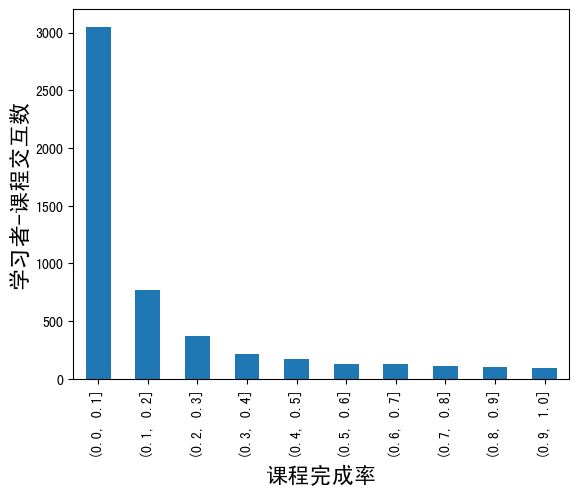

In [254]:
import matplotlib.pyplot as plt
from matplotlib import ticker

bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
complete_rate_bins = pd.cut(complete_rate_list, bins=bins)
complete_rate_bins.value_counts().plot(kind='bar')

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# plt.title('课程完成率统计图', fontdict={'size': 16})
plt.xlabel('课程完成率', fontdict={'size': 16})
plt.ylabel('学习者-课程交互数', fontdict={'size': 16})
plt.show()

In [255]:
complete_rate_bins.value_counts()

(0.0, 0.1]    3051
(0.1, 0.2]     773
(0.2, 0.3]     372
(0.3, 0.4]     214
(0.4, 0.5]     170
(0.5, 0.6]     133
(0.6, 0.7]     130
(0.7, 0.8]     109
(0.8, 0.9]     100
(0.9, 1.0]      96
dtype: int64

In [256]:
h_user_cnt = 0 # 高完成率用户数
l_user_cnt = 0 # 低完成率用户数

h_user_list = []
l_user_list = []

for u, cr_list in user_complete_rate_dict.items():
    h_flag = 1
    l_flag = 1
    for cr in cr_list:
        if cr <= 0.8:
            h_flag = 0
        if cr > 0.2:
            l_flag = 0
    if h_flag:
        h_user_cnt += h_flag
        h_user_list.append(u)
    if l_flag:
        l_user_cnt += l_flag
        l_user_list.append(u)
        

h_user_cnt, l_user_cnt

(13, 977)

In [257]:
m_user_cnt = len(user_complete_rate_dict.keys()) - h_user_cnt - l_user_cnt
m_user_cnt

723

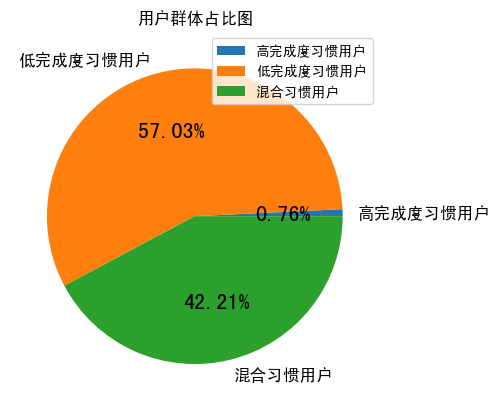

In [258]:
x = [h_user_cnt, l_user_cnt, m_user_cnt]
labels = ['高完成度习惯用户', '低完成度习惯用户', '混合习惯用户']

patches, l_txt, p_txt = plt.pie(x=x, labels=labels, autopct='%1.2f%%')
for l in l_txt:
    l.set_size(12)
for p in p_txt:
    p.set_size(16)

plt.title('用户群体占比图')
plt.legend(loc='upper right')
plt.show()

In [259]:
user_course_video_concept = pd.merge(selected_user_action_df[['user_id', 'course_id', 'video_id', 'start_time']],
                                     selected_video_concept, on='video_id')

In [260]:
user_course_video_concept = pd.merge(user_course_video_concept, selected_course_info, on='course_id')

In [261]:
user_course_video_concept = pd.merge(user_course_video_concept, selected_teacher_course, on='course_id')